# **K- Means Clustering**
## **by Aishwarya Dharan**

Predicting optimum number of clusters and representing it visually

## **Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

## **Loading Iris Datasets**

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## **Find the optimum number of clusters for K Means and determine the value of K**

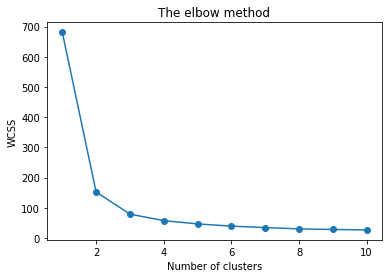

In [3]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### **Applying K-Means Model to the dataset**

In [4]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(x)

### **Visualizing the Clusters**

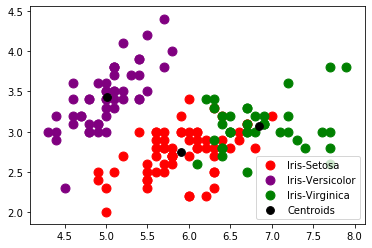

In [5]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Iris-Setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = 'purple', label = 'Iris-Versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Iris-Virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 60, c = 'black', label = 'Centroids')
plt.legend()
plt.show()